In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('AAPL.csv')

In [16]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-02-19 00:00:00+00:00,170.93,171.44,169.49,169.71,18972826,41.137246,41.259986,40.790685,40.843632,75891304,0.0,1.0
1,AAPL,2019-02-20 00:00:00+00:00,172.03,173.32,170.99,171.19,26114362,41.401980,41.712440,41.151686,41.199819,104457448,0.0,1.0
2,AAPL,2019-02-21 00:00:00+00:00,171.06,172.37,170.30,171.80,17249670,41.168532,41.483806,40.985625,41.346626,68998680,0.0,1.0
3,AAPL,2019-02-22 00:00:00+00:00,172.97,173.00,171.38,171.58,18913154,41.628207,41.635427,41.245546,41.293679,75652616,0.0,1.0
4,AAPL,2019-02-25 00:00:00+00:00,174.23,175.87,173.95,174.16,21873358,41.931447,42.326142,41.864061,41.914601,87493432,0.0,1.0


In [31]:
# will be doing stock prediction based on open. however we can do this based on other params as well
df1 = df.reset_index()['open']

In [32]:
df1

0       169.710
1       171.190
2       171.800
3       171.580
4       174.160
         ...   
1254    188.415
1255    185.770
1256    185.320
1257    183.550
1258    183.420
Name: open, Length: 1259, dtype: float64

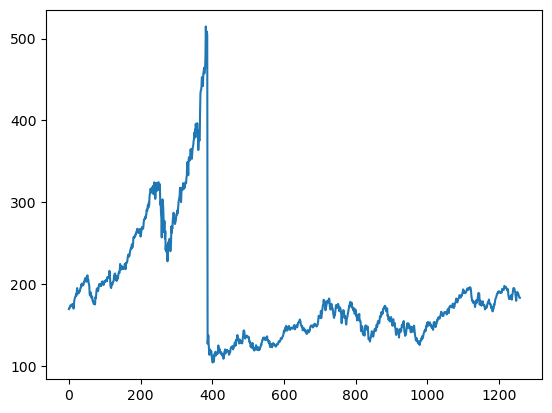

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [34]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [35]:
import numpy as np

In [27]:
!pip install scikit-learn

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
df1

array([[0.15885436],
       [0.16246191],
       [0.16394881],
       ...,
       [0.19690433],
       [0.19258988],
       [0.192273  ]])

# Data Preprocessing

In [38]:
'''in case of time series data, there is something called timesteps. if my data is 120,123,132,111 and timesteps
is 2,
we will have two features(f1,f2) and output will be dependent of these features

f1  f2     op
120 123 -> 132
123 132 -> 111

in case of time series data, we can't use cross validation or random seed
'''

"in case of time series data, there is something called timesteps. if my data is 120,123,132,111 and timesteps\nis 2,\nwe will have two features(f1,f2) and output will be dependent of these features\n\nf1  f2     op\n120 123 -> 132\n123 132 -> 111\n\nin case of time series data, we can't use cross validation or random seed\n"

In [39]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create LSTM Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-02-18 19:10:16.813773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

2024-02-18 19:10:27.076778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-18 19:10:27.077745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-18 19:10:27.078878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


2024-02-18 19:10:27.567563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-18 19:10:27.568921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-18 19:10:27.570314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2024-02-18 19:10:46.786604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-18 19:10:46.787714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-18 19:10:46.788859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - ETA: 0s - loss: 0.0260

2024-02-18 19:10:51.958253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-18 19:10:51.959311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-18 19:10:51.960435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 6s 158ms/step - loss: 0.0260 - val_loss: 0.0014
Epoch 2/100
13/13 [==============================] - 1s 89ms/step - loss: 0.0123 - val_loss: 2.0160e-04
Epoch 3/100
13/13 [==============================] - 1s 90ms/step - loss: 0.0088 - val_loss: 5.7127e-04
Epoch 4/100
13/13 [==============================] - 1s 92ms/step - loss: 0.0073 - val_loss: 2.1691e-04
Epoch 5/100
13/13 [==============================] - 1s 92ms/step - loss: 0.0060 - val_loss: 2.5015e-04
Epoch 6/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0052 - val_loss: 3.9800e-04
Epoch 7/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0046 - val_loss: 3.5017e-04
Epoch 8/100
13/13 [==============================] - 1s 106ms/step - loss: 0.0042 - val_loss: 2.0247e-04
Epoch 9/100
13/13 [==============================] - 2s 111ms/step - loss: 0.0039 - val_loss: 4.8133e-04
Epoch 10/100
13/13 [==============================] - 1s 107ms/step - loss: 

13/13 [==============================] - 3s 213ms/step - loss: 0.0012 - val_loss: 1.4501e-04
Epoch 79/100
13/13 [==============================] - 3s 214ms/step - loss: 9.7993e-04 - val_loss: 1.4131e-04
Epoch 80/100
13/13 [==============================] - 3s 201ms/step - loss: 8.6393e-04 - val_loss: 1.1111e-04
Epoch 81/100
13/13 [==============================] - 4s 304ms/step - loss: 8.9859e-04 - val_loss: 1.2839e-04
Epoch 82/100
13/13 [==============================] - 3s 269ms/step - loss: 9.7761e-04 - val_loss: 1.1408e-04
Epoch 83/100
13/13 [==============================] - 3s 246ms/step - loss: 0.0010 - val_loss: 1.1741e-04
Epoch 84/100
13/13 [==============================] - 3s 254ms/step - loss: 0.0011 - val_loss: 1.2098e-04
Epoch 85/100
13/13 [==============================] - 3s 230ms/step - loss: 8.1121e-04 - val_loss: 1.1520e-04
Epoch 86/100
13/13 [==============================] - 3s 239ms/step - loss: 8.6816e-04 - val_loss: 1.0774e-04
Epoch 87/100
13/13 [===============

In [48]:
import tensorflow as tf

In [49]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#Transform back to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

2024-02-18 19:17:41.052487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-18 19:17:41.053429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-18 19:17:41.054669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 0s 22ms/step


In [50]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

214.1949205052931

In [51]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

173.3811828898688

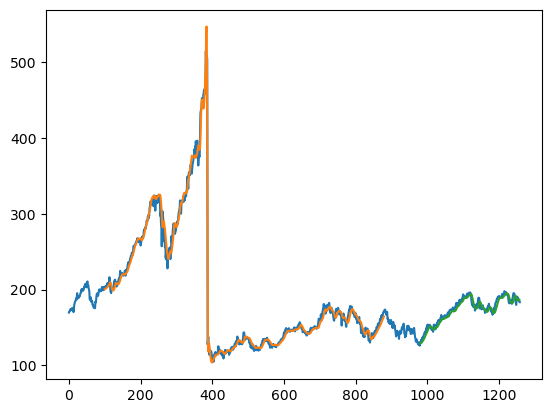

In [52]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Prediction

In [54]:
# we will be predicting stock price of a day, based on previous 100 days
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.19624406]
101
1 day input [0.16594759 0.15795247 0.16448507 0.16253504 0.16505789 0.16221816
 0.16879951 0.16882389 0.17616088 0.1793053  0.17954906 0.18410725
 0.18739793 0.17601463 0.17575868 0.17316271 0.17428397 0.17250457
 0.1617794  0.16699573 0.16414381 0.16046313 0.15202925 0.15717246
 0.15797684 0.16199878 0.17301645 0.1698964  0.17511274 0.18193784
 0.18966484 0.19115174 0.19361365 0.1981231  0.20270567 0.20305911
 0.20726386 0.20892139 0.20804388 0.21174893 0.21194394 0.21043266
 0.208117   0.20777575 0.21050579 0.207922   0.20911639 0.20826325
 0.20882389 0.21915905 0.21716027 0.21854966 0.21589275 0.21581962
 0.22071907 0.22786106 0.22666667 0.22315661 0.22332724 0.22513102
 0.22318099 0.22093845 0.21711152 0.21438147 0.21840341 0.2178184
 0.20136502 0.19422303 0.18917733 0.18878732 0.18901889 0.19349177
 0.19453991 0.19987812 0.1987081  0.18920171 0.1870323  0.19878123
 0.20667885 0.21391834 0.22054845 0.22152346 0.22103595 0.21872029
 0.21321146 0.21060329 0.20109689 

8 day output [[0.18893504]]
9 day input [0.17616088 0.1793053  0.17954906 0.18410725 0.18739793 0.17601463
 0.17575868 0.17316271 0.17428397 0.17250457 0.1617794  0.16699573
 0.16414381 0.16046313 0.15202925 0.15717246 0.15797684 0.16199878
 0.17301645 0.1698964  0.17511274 0.18193784 0.18966484 0.19115174
 0.19361365 0.1981231  0.20270567 0.20305911 0.20726386 0.20892139
 0.20804388 0.21174893 0.21194394 0.21043266 0.208117   0.20777575
 0.21050579 0.207922   0.20911639 0.20826325 0.20882389 0.21915905
 0.21716027 0.21854966 0.21589275 0.21581962 0.22071907 0.22786106
 0.22666667 0.22315661 0.22332724 0.22513102 0.22318099 0.22093845
 0.21711152 0.21438147 0.21840341 0.2178184  0.20136502 0.19422303
 0.18917733 0.18878732 0.18901889 0.19349177 0.19453991 0.19987812
 0.1987081  0.18920171 0.1870323  0.19878123 0.20667885 0.21391834
 0.22054845 0.22152346 0.22103595 0.21872029 0.21321146 0.21060329
 0.20109689 0.19365021 0.18359537 0.20380256 0.20065814 0.20987203
 0.20681292 0.20502133

17 day output [[0.18278295]]
18 day input [0.17250457 0.1617794  0.16699573 0.16414381 0.16046313 0.15202925
 0.15717246 0.15797684 0.16199878 0.17301645 0.1698964  0.17511274
 0.18193784 0.18966484 0.19115174 0.19361365 0.1981231  0.20270567
 0.20305911 0.20726386 0.20892139 0.20804388 0.21174893 0.21194394
 0.21043266 0.208117   0.20777575 0.21050579 0.207922   0.20911639
 0.20826325 0.20882389 0.21915905 0.21716027 0.21854966 0.21589275
 0.21581962 0.22071907 0.22786106 0.22666667 0.22315661 0.22332724
 0.22513102 0.22318099 0.22093845 0.21711152 0.21438147 0.21840341
 0.2178184  0.20136502 0.19422303 0.18917733 0.18878732 0.18901889
 0.19349177 0.19453991 0.19987812 0.1987081  0.18920171 0.1870323
 0.19878123 0.20667885 0.21391834 0.22054845 0.22152346 0.22103595
 0.21872029 0.21321146 0.21060329 0.20109689 0.19365021 0.18359537
 0.20380256 0.20065814 0.20987203 0.20681292 0.20502133 0.20444851
 0.19800122 0.19690433 0.19258988 0.192273   0.19624406 0.19473892
 0.19356027 0.1926121

27 day output [[0.17592171]]
28 day input [0.1698964  0.17511274 0.18193784 0.18966484 0.19115174 0.19361365
 0.1981231  0.20270567 0.20305911 0.20726386 0.20892139 0.20804388
 0.21174893 0.21194394 0.21043266 0.208117   0.20777575 0.21050579
 0.207922   0.20911639 0.20826325 0.20882389 0.21915905 0.21716027
 0.21854966 0.21589275 0.21581962 0.22071907 0.22786106 0.22666667
 0.22315661 0.22332724 0.22513102 0.22318099 0.22093845 0.21711152
 0.21438147 0.21840341 0.2178184  0.20136502 0.19422303 0.18917733
 0.18878732 0.18901889 0.19349177 0.19453991 0.19987812 0.1987081
 0.18920171 0.1870323  0.19878123 0.20667885 0.21391834 0.22054845
 0.22152346 0.22103595 0.21872029 0.21321146 0.21060329 0.20109689
 0.19365021 0.18359537 0.20380256 0.20065814 0.20987203 0.20681292
 0.20502133 0.20444851 0.19800122 0.19690433 0.19258988 0.192273
 0.19624406 0.19473892 0.19356027 0.19261214 0.19179666 0.19104853
 0.19033188 0.18962976 0.18893504 0.18824488 0.18755808 0.18687379
 0.18619129 0.18550986 

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

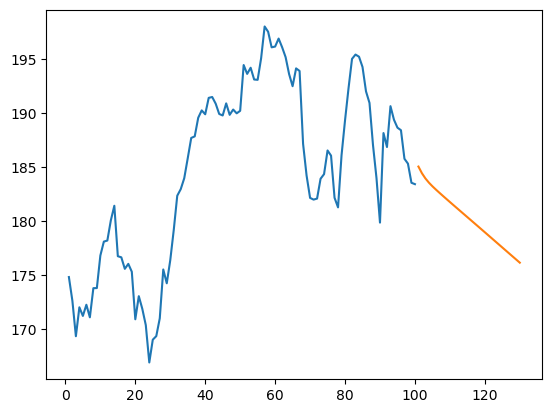

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

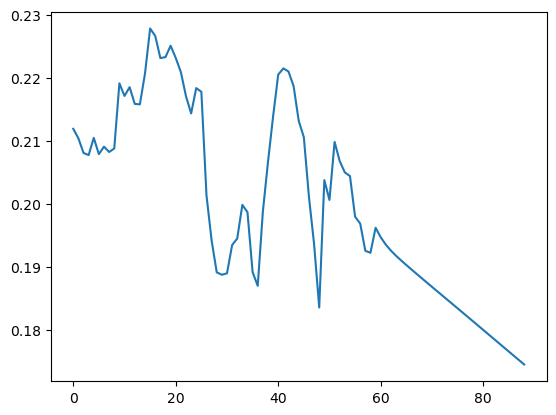

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [60]:
df3=scaler.inverse_transform(df3).tolist()

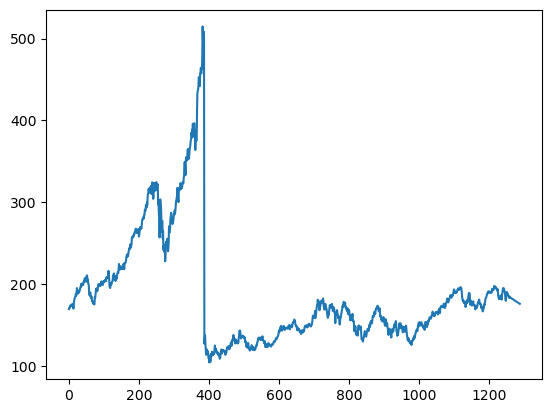

In [61]:
plt.plot(df3)